In [2]:
import pandas as pd
data = pd.read_csv('merged_data.csv')

In [23]:
#1.Prepare Time Series Data

In [24]:
# Assuming 'data' is your pandas DataFrame with relevant columns

# Convert date columns to datetime if needed
data['BookingEndDateTime_x'] = pd.to_datetime(data['BookingEndDateTime (Month / Day / Year)_x'])
data['BookingEndDateTime_y'] = pd.to_datetime(data['BookingEndDateTime (Month / Day / Year)_y'])




In [25]:
#2.Select and Train Forecasting Model

In [6]:
# Aggregate data if needed (e.g., monthly aggregation)
data_agg_x = data.groupby(pd.Grouper(key='BookingEndDateTime_x', freq='M'))['Number Booked_x'].sum().reset_index()
data_agg_y = data.groupby(pd.Grouper(key='BookingEndDateTime_y', freq='M'))['Number Booked_y'].sum().reset_index()



C:\Users\chait\AppData\Local\Temp\ipykernel_16716\2873994786.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_agg_x = data.groupby(pd.Grouper(key='BookingEndDateTime_x', freq='M'))['Number Booked_x'].sum().reset_index()
C:\Users\chait\AppData\Local\Temp\ipykernel_16716\2873994786.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_agg_y = data.groupby(pd.Grouper(key='BookingEndDateTime_y', freq='M'))['Number Booked_y'].sum().reset_index()


In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'data' is your DataFrame
y = data['Number Booked_x']  # Select the target column

# Train the model
model = SimpleExpSmoothing(y)
model_fit = model.fit(smoothing_level=0.2)  # Set alpha (smoothing parameter) here

# Forecast future values
forecast_steps = 12  # Example: Forecasting 12 periods ahead
forecast = model_fit.forecast(steps=forecast_steps)

# Use the forecast for further analysis
# ...


C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


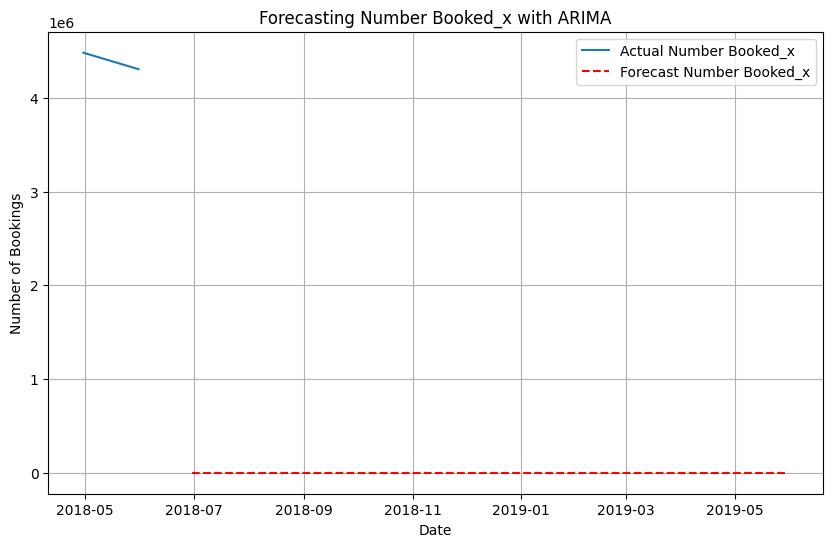

In [21]:

import matplotlib.pyplot as plt

# Assuming 'forecast' contains your forecasted values and 'y.index' is your datetime index

# Plotting example with forecast
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual Number Booked_x')
plt.plot(pd.date_range(start=y.index[-1], periods=forecast_steps+1, freq='ME')[1:], forecast, 'r--', label='Forecast Number Booked_x')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.title('Forecasting Number Booked_x with ARIMA')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
#3.Validate Forecasts

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error




# Example: Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Example: Features and target
features = ['MaxBookees_x', 'Price (INR)_x']  # Adjust features as needed
target = 'Number Booked_x'

X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Example: Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Example: Forecasting
y_pred = model.predict(X_test)

# Example: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Example: Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, y_pred, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number Booked')
plt.title('Forecast vs Actual')
plt.legend()
plt.show()
